# PVA-03
In dieser Aufgabe werden verschiedene Klassifikatoren auf dem Datensatz aus der letzten Aufgabe trainiert und verglichen.
## Datensatz zusammenführen
Zunächst werden die Datensätze aus der letzten Aufgabe geladen und in eine einzelne `csv`-Datei zusammengeführt. Da einige der Zeilen mit einem Komma enden, muss dieses dort entfernt werden. Einige Datensätze mussten nach manueller Überprüfung entfernt werden, da diese nicht interpretierbare Daten enthielten (leere Bilder, Bilder mit zuwenig information, welche auch für Menschen nicht erkennbar sind).


In [106]:
import os
import csv

directory = 'Datensatz/'
csv_data = 'combined_data.csv'
csv_files = [f for f in os.listdir(directory)]

combined_data = []

for file in csv_files:
    filepath = os.path.join(directory, file)
    with open(filepath, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            combined_data.append(row)

with open(csv_data, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    for row in combined_data:
        writer.writerow(row)
        
# remove trailing commas in the lines ending with a comma
with open(csv_data, 'r') as infile, open('combined_data_clean.csv', 'w') as outfile:
    data = infile.read()
    data = data.replace(',\n', '\n')
    outfile.write(data)
    

    

Als nächstes wird das CSV File in ein Pandas Dataframe geladen, was Operationen mit den Daten erleichtert:

In [107]:
import pandas as pd

clean_data = 'combined_data_clean.csv'

dataframe = pd.read_csv(clean_data, header=None, delimiter=',')
print(dataframe.head())

                            0    1    2    3    4    5    6    7    8    9    \
0  #-41-cornelia.isenschmid.png    0    0    0    0    0    0    0    0    0   
1  #-42-cornelia.isenschmid.png    0    0    0    0    0    0    0    0    0   
2  #-43-cornelia.isenschmid.png    0    0    0    0    0    0    0    0    0   
3  #-44-cornelia.isenschmid.png    0    0    0    0    0    0    0    0    0   
4  #-45-cornelia.isenschmid.png    0    0    0    0    0    0    0    1    0   

   ...  91   92   93   94   95   96   97   98   99   100  
0  ...    0    0    0    0    0    0    0    0    0    0  
1  ...    0    1    0    1    0    0    0    0    0    0  
2  ...    0    1    0    1    0    0    0    0    0    0  
3  ...    0    0    0    0    0    0    0    0    0    0  
4  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 101 columns]


## Abschliessende Bereinigung, Label extrahieren
Nun wird die erste Spalte der Daten bereinigt; aus der ersten Spalte wird nur das erste Zeichen extrahiert, dieses ist das Label für die Daten. Das Label wird in eine neue Spalte geschrieben und die erste Spalte wird gelöscht.

In [108]:
# remove rows with missing values (only 0 in a row)
dataframe = dataframe[(dataframe.T != 0).any()]

# in the first column: keep only the first character, which is the label
dataframe[0] = dataframe[0].str[0]
data_labels = dataframe[0].values
# remove the first column
dataframe = dataframe.drop(0, axis=1)
    



## Aufteilen in Trainings- und Testdaten
Anschliessend werden die Daten in Trainings- und Testdaten aufgeteilt. Die Trainingsdaten werden für das Training des Klassifikators verwendet, die Testdaten werden für die Evaluation des Klassifikators verwendet. Die Daten werden zufällig aufgeteilt, wobei 80% der Daten für das Training und 20% der Daten für die Evaluation verwendet werden.

In [109]:
# separate the data into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataframe, data_labels, test_size=0.2, random_state=99)

In [110]:
# Describe the training set
x_train.describe()



,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.008333,0.014583,0.010417,0.025000,0.033333,0.027083,0.018750,0.029167,0.012500,0.012500,...,0.010417,0.025000,0.022917,0.056250,0.037500,0.027083,0.039583,0.016667,0.010417,0.245833
std,0.091001,0.120003,0.101635,0.156288,0.179693,0.162496,0.135782,0.168449,0.111218,0.111218,...,0.101635,0.156288,0.149794,0.230644,0.190182,0.162496,0.195182,0.128153,0.101635,0.431029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
# Describe the test set
x_test.describe()


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,120.00000,120.000000,120.000000,120.00000,120.000000,120.00000,120.0,120.00000,120.0,120.000000,...,120.000000,120.000000,120.00000,120.000000,120.000000,120.00000,120.00000,120.00000,120.000000,120.000000
mean,0.02500,0.041667,0.033333,0.02500,0.033333,0.02500,0.0,0.02500,0.0,0.016667,...,0.008333,0.016667,0.02500,0.016667,0.058333,0.02500,0.02500,0.02500,0.016667,0.266667
std,0.15678,0.200664,0.180258,0.15678,0.180258,0.15678,0.0,0.15678,0.0,0.128556,...,0.091287,0.128556,0.15678,0.128556,0.235355,0.15678,0.15678,0.15678,0.128556,0.444071
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,0.0,1.00000,0.0,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000


## Klassifikatoren trainieren und vergleichen
Die folgenden Klassifikatoren werden verwendet:
- SVM
- Decision Tree
- K-Nearest Neighbors

### SVM Modell trainieren
Die SVM wird mit dem RBF Kernel verwendet. Das Modell wird mit den Trainingsdaten `x_train` trainiert und anschliessend mit den Testdaten `x_test` evaluiert. Anschliessend werden die Masse *precision*, *recall* und *f1-score* berechnet und ausgegeben. Schlussendlich wird die Confusion Matrix erstellt.

{'#': {'precision': 0.95, 'recall': 0.95, 'f1-score': 0.9500000000000001, 'support': 20}, '+': {'precision': 0.9523809523809523, 'recall': 0.9090909090909091, 'f1-score': 0.9302325581395349, 'support': 22}, '-': {'precision': 0.8695652173913043, 'recall': 1.0, 'f1-score': 0.9302325581395349, 'support': 20}, 'o': {'precision': 1.0, 'recall': 0.9642857142857143, 'f1-score': 0.9818181818181818, 'support': 28}, 'x': {'precision': 1.0, 'recall': 0.9666666666666667, 'f1-score': 0.983050847457627, 'support': 30}, 'accuracy': 0.9583333333333334, 'macro avg': {'precision': 0.9543892339544513, 'recall': 0.958008658008658, 'f1-score': 0.9550668291109756, 'support': 120}, 'weighted avg': {'precision': 0.9611973775017252, 'recall': 0.9583333333333334, 'f1-score': 0.9587683496374864, 'support': 120}}


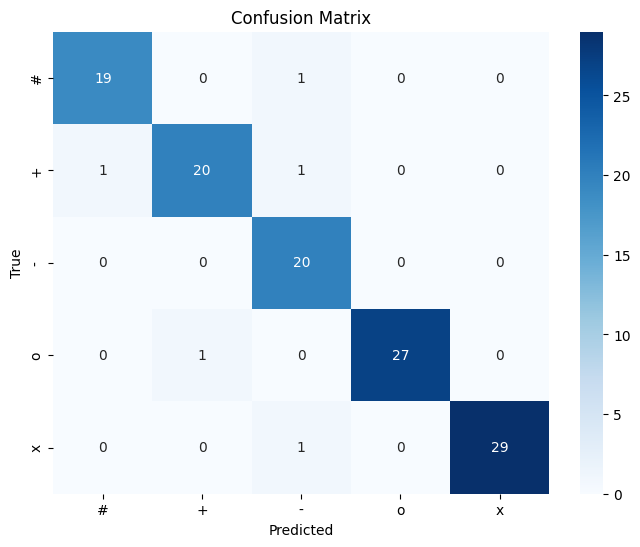

In [112]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

# predict
y_pred = svm_model.predict(x_test)
svm_report = classification_report(y_test, y_pred,output_dict=True)
print(svm_report)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Modell trainieren




{'#': {'precision': 0.8571428571428571, 'recall': 0.6, 'f1-score': 0.7058823529411764, 'support': 20}, '+': {'precision': 0.8, 'recall': 0.7272727272727273, 'f1-score': 0.761904761904762, 'support': 22}, '-': {'precision': 0.6129032258064516, 'recall': 0.95, 'f1-score': 0.7450980392156863, 'support': 20}, 'o': {'precision': 0.7333333333333333, 'recall': 0.7857142857142857, 'f1-score': 0.7586206896551724, 'support': 28}, 'x': {'precision': 0.76, 'recall': 0.6333333333333333, 'f1-score': 0.6909090909090909, 'support': 30}, 'accuracy': 0.7333333333333333, 'macro avg': {'precision': 0.7526758832565283, 'recall': 0.7392640692640693, 'f1-score': 0.7324829869251777, 'support': 120}, 'weighted avg': {'precision': 0.7527854582693293, 'recall': 0.7333333333333333, 'f1-score': 0.7312513720221631, 'support': 120}}


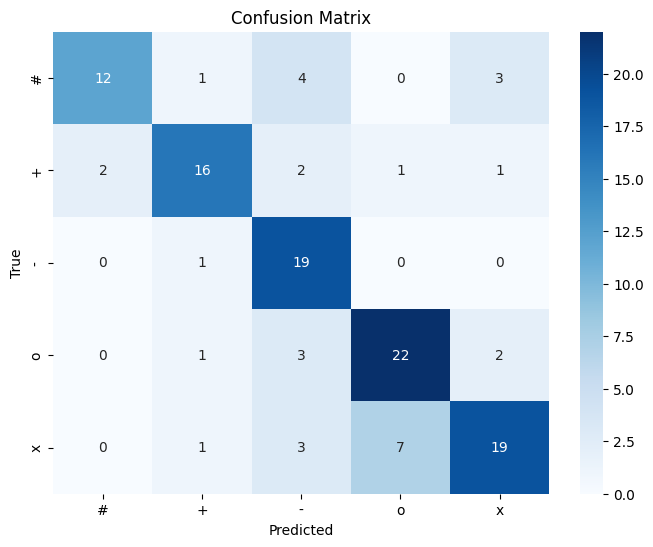

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

dt_report = classification_report(y_test, y_pred,output_dict=True)
print(dt_report)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Es wird versucht, die Performance mit den foglenden Parametern zu verbessern:
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Dazu wird ein Grid Search durchgeführt, welcher die besten Parameter für das Modell findet. Anschliessend wird das Modell mit den besten Parametern trainiert und evaluiert. Anschliessend werden die Masse *precision*, *recall* und *f1-score* berechnet und ausgegeben. Schlussendlich wird die Confusion Matrix erstellt.

Best Hyperparameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'#': {'precision': 0.75, 'recall': 0.6, 'f1-score': 0.6666666666666665, 'support': 20}, '+': {'precision': 0.75, 'recall': 0.8181818181818182, 'f1-score': 0.7826086956521738, 'support': 22}, '-': {'precision': 0.59375, 'recall': 0.95, 'f1-score': 0.7307692307692308, 'support': 20}, 'o': {'precision': 0.875, 'recall': 0.75, 'f1-score': 0.8076923076923077, 'support': 28}, 'x': {'precision': 0.8333333333333334, 'recall': 0.6666666666666666, 'f1-score': 0.7407407407407408, 'support': 30}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7604166666666667, 'recall': 0.756969696969697, 'f1-score': 0.745695528304224, 'support': 120}, 'weighted avg': {'precision': 0.7739583333333333, 'recall': 0.75, 'f1-score': 0.7500309674222717, 'support': 120}}


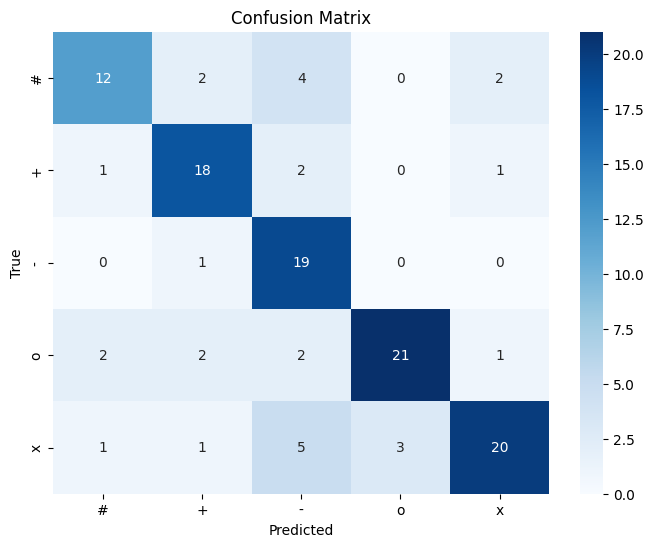

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

decision_tree = DecisionTreeClassifier()

# Define the range of hyperparameters to explore
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate performance on test data
y_pred = best_decision_tree.predict(x_test)
dt_report_2 = classification_report(y_test, y_pred,output_dict=True)
print(dt_report_2)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### K-nearest neighbors trainieren
Zu letzt wird noch der K-nearest neighbors Klassifikator trainiert. Es gilt $k=5$. Anschliessend werden die Masse *precision*, *recall* und *f1-score* berechnet und ausgegeben. Schlussendlich wird die Confusion Matrix erstellt.

{'#': {'precision': 1.0, 'recall': 0.65, 'f1-score': 0.787878787878788, 'support': 20}, '+': {'precision': 0.8888888888888888, 'recall': 0.7272727272727273, 'f1-score': 0.7999999999999999, 'support': 22}, '-': {'precision': 0.5263157894736842, 'recall': 1.0, 'f1-score': 0.6896551724137931, 'support': 20}, 'o': {'precision': 0.92, 'recall': 0.8214285714285714, 'f1-score': 0.8679245283018867, 'support': 28}, 'x': {'precision': 1.0, 'recall': 0.8666666666666667, 'f1-score': 0.9285714285714286, 'support': 30}, 'accuracy': 0.8166666666666667, 'macro avg': {'precision': 0.8670409356725145, 'recall': 0.8130735930735931, 'f1-score': 0.8148059834331793, 'support': 120}, 'weighted avg': {'precision': 0.8820155945419104, 'recall': 0.8166666666666667, 'f1-score': 0.8275809071287276, 'support': 120}}


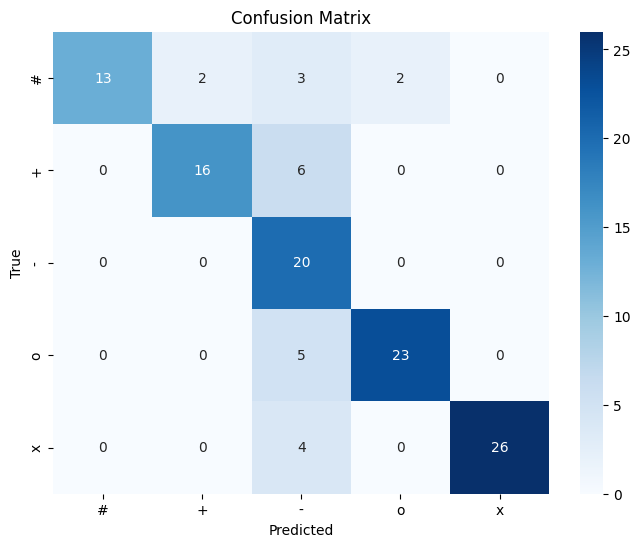

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(x_train, y_train)  # x_train: feature matrix, y_train: labels

# Predict labels for the test set
y_pred = knn_classifier.predict(x_test)  # x_test: feature matrix

# Evaluate the classifier
knn_report = classification_report(y_test, y_pred,output_dict=True)
print(knn_report)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [116]:
### Vergleich der drei Klassifikatoren
Als nächstes wird die Performance der drei Klassifikatoren verglichen:

SyntaxError: invalid syntax (2017525692.py, line 2)

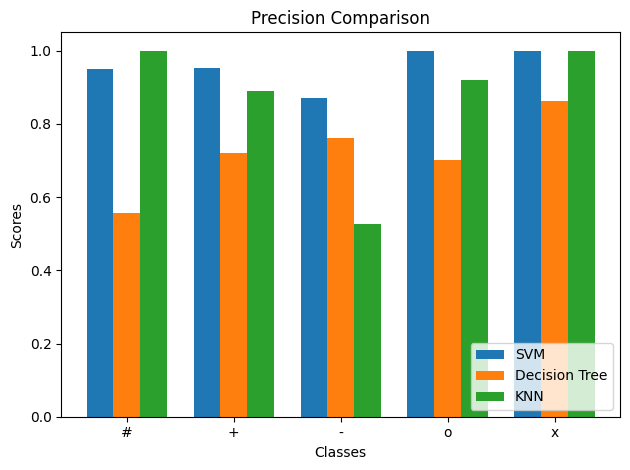

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class labels
labels = list(svm_report.keys())[:-3]

# Precision scores for each class
svm_precision = [svm_report[label]['precision'] for label in labels]
dt_precision = [dt_report[label]['precision'] for label in labels]
knn_precision = [knn_report[label]['precision'] for label in labels]

# Recall scores for each class
svm_recall = [svm_report[label]['recall'] for label in labels]
dt_recall = [dt_report[label]['recall'] for label in labels]
knn_recall = [knn_report[label]['recall'] for label in labels]

# F1-scores for each class
svm_f1 = [svm_report[label]['f1-score'] for label in labels]
dt_f1 = [dt_report[label]['f1-score'] for label in labels]
knn_f1 = [knn_report[label]['f1-score'] for label in labels]



# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars
bar_positions = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots()

# Plotting bars for each classifier
ax.bar(bar_positions - bar_width, svm_precision, bar_width, label='SVM')
ax.bar(bar_positions, dt_precision, bar_width, label='Decision Tree')
ax.bar(bar_positions + bar_width, knn_precision, bar_width, label='KNN')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision Comparison')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend()
ax.legend(loc='lower right') 

# Show the plot
plt.tight_layout()
plt.show()

Da der decision tree Klassifikator am schlechtesten abgeschnitten hat, wurde dieser mittels grid search optimiert. Der folgende Plot zeigt die Performance des decision tree Klassifikators mit den besten Parametern im Vergleich zu den anderen Klassifikatoren:

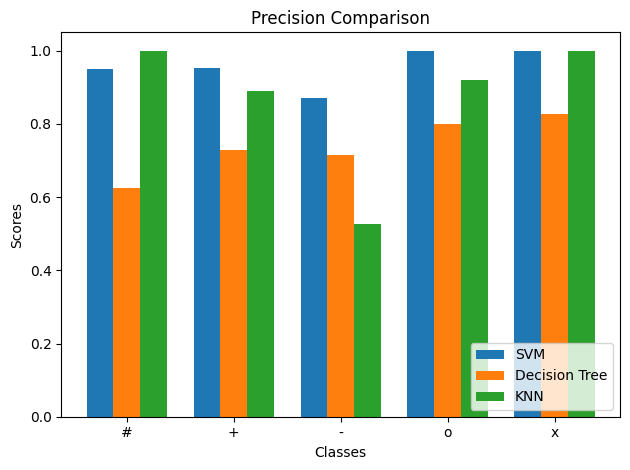

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class labels
labels = list(svm_report.keys())[:-3]

# Precision scores for each class
svm_precision = [svm_report[label]['precision'] for label in labels]
dt_precision = [dt_report_2[label]['precision'] for label in labels]
knn_precision = [knn_report[label]['precision'] for label in labels]

# Recall scores for each class
svm_recall = [svm_report[label]['recall'] for label in labels]
dt_recall = [dt_report_2[label]['recall'] for label in labels]
knn_recall = [knn_report[label]['recall'] for label in labels]

# F1-scores for each class
svm_f1 = [svm_report[label]['f1-score'] for label in labels]
dt_f1 = [dt_report_2[label]['f1-score'] for label in labels]
knn_f1 = [knn_report[label]['f1-score'] for label in labels]



# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars
bar_positions = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots()

# Plotting bars for each classifier
ax.bar(bar_positions - bar_width, svm_precision, bar_width, label='SVM')
ax.bar(bar_positions, dt_precision, bar_width, label='Decision Tree')
ax.bar(bar_positions + bar_width, knn_precision, bar_width, label='KNN')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision Comparison')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend()
ax.legend(loc='lower right') 

# Show the plot
plt.tight_layout()
plt.show()

## Ergebnisse
Schlussendlich zeigt sich die beste Performance für die SVM, dicht gefolgt durch k-nearest neighbour. 